# Evaluation of Survey Results

In [ ]:
!pip install pingouin


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.6/198.6 kB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7026 sha256=496daeaeaf9dfdfe9674cf0d961939d16c10e2589f8af4edbb2c3f7e8050d111
  Stored in directory: /root/.cache/pip/wheels/3d/fe/b0/27a9892da57472e538c7452a721a9cf463cc03cf7379889266
Successfully built littleutils


In [ ]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
from nltk import agreement
import numpy as np
#import pingouin as pg
import numpy as np
from scipy import stats as st
import statistics

drive.mount('/content/drive')
pd.options.mode.chained_assignment = None

Mounted at /content/drive


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Masterthesis/Results/Survey Text Generation Quality.csv")

In [ ]:
def sentiment_neg_convert(score):
  if score==1:
    return 5
  if score==2:
    return 4
  if score==3:
    return 3
  if score==4:
    return 2
  if score==5:
    return 1

##Resample data

Since the surveys groups have been filled out througn diffent numbers of participants. From every, 14 surveys from each group is selected for further evaluation.

In [ ]:
df_gruen=df[df["Wähle eine Farbe aus!"]=="Grün"]
df_gruen=df_gruen.dropna(axis=1)
df_gruen=df_gruen.sample(n=14, random_state=0)
df_gelb=df[df["Wähle eine Farbe aus!"]=="Gelb"]
df_gelb=df_gelb.dropna(axis=1)
df_gelb=df_gelb.sample(n=14, random_state=0)
df_lila=df[df["Wähle eine Farbe aus!"]=="Lila"]
df_lila=df_lila.dropna(axis=1)
df_lila=df_lila.sample(n=14, random_state=0)
df=pd.concat([df_gruen,df_gelb,df_lila])


## IAA: Multi-Kappa

In [ ]:
df_gruen_for_kappa=df_gruen.iloc[:,4:-1]
df_gruen_for_kappa_tp=df_gruen_for_kappa.T
def kappa(df):
  annotations=[]
  for i in df.index:
    user=i
    for j in df.columns:
      task=j
      score=df.loc[i,j]
      annotations.append([user,task,score])
  annotations

  annotationtask = agreement.AnnotationTask(data=annotations)
  return annotationtask.multi_kappa()


In [ ]:
df_gelb_for_kappa=df_gelb.iloc[:,4:-1]
df_gruen_for_kappa=df_gruen.iloc[:,4:-1]
df_lila_for_kappa=df_lila.iloc[:,4:-1]
print(kappa(df_gelb_for_kappa))
print(kappa(df_gruen_for_kappa))
print(kappa(df_lila_for_kappa))

0.1787938061579943
0.14342995966695757
0.18296739853626073


# Analysis influence keywords and sentiment

## Matches the sentiment the selected one?

<Axes: xlabel='sentiment'>

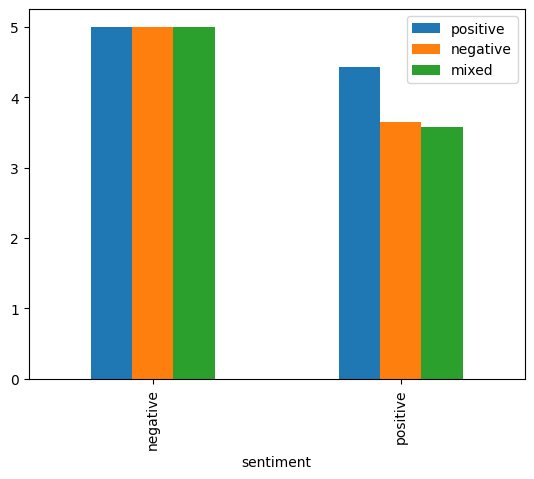

In [ ]:
pos_sent_neg_key=pd.DataFrame()
pos_sent_pos_key=pd.DataFrame()
pos_sent_mix_key=pd.DataFrame()
neg_sent_neg_key=pd.DataFrame()
neg_sent_pos_key=pd.DataFrame()
neg_sent_mix_key=pd.DataFrame()

pos_sent_neg_key["negative"]=df_gelb["Dieser Text ist positiv."]
pos_sent_neg_key.loc[:,"sentiment"]="positive"
pos_sent_pos_key["positive"]=df_lila[["Dieser Text ist positiv..1"]]
pos_sent_pos_key.loc[:,"sentiment"]="positive"
pos_sent_mix_key["mixed"]=df_gruen[["Dieser Text ist positiv..2"]]
pos_sent_mix_key.loc[:,"sentiment"]="positive"
neg_sent_neg_key["negative"]=df_gruen["Dieser Text ist positiv..3"].apply(sentiment_neg_convert)
neg_sent_neg_key.loc[:,"sentiment"]="negative"
neg_sent_pos_key["positive"]=df_gelb["Dieser Text ist positiv..4"].apply(sentiment_neg_convert)
neg_sent_pos_key.loc[:,"sentiment"]="negative"
neg_sent_mix_key["mixed"]=df_lila["Dieser Text ist positiv..5"].apply(sentiment_neg_convert)
neg_sent_mix_key.loc[:,"sentiment"]="negative"

sent=pd.concat([pos_sent_neg_key,pos_sent_pos_key,pos_sent_mix_key,neg_sent_neg_key,neg_sent_pos_key,neg_sent_mix_key])
sent_grouped=sent.groupby(["sentiment"]).mean().reset_index()

sent_grouped.plot(x="sentiment", y=["positive", "negative","mixed"], kind="bar")

In [ ]:
pos_sent_neg_key=pd.DataFrame()
pos_sent_pos_key=pd.DataFrame()
pos_sent_mix_key=pd.DataFrame()
neg_sent_neg_key=pd.DataFrame()
neg_sent_pos_key=pd.DataFrame()
neg_sent_mix_key=pd.DataFrame()

pos_sent_neg_key["score"]=df_gelb["Dieser Text ist positiv."]
pos_sent_neg_key.loc[:,"sentiment"]="positive"
pos_sent_pos_key["score"]=df_lila[["Dieser Text ist positiv..1"]]
pos_sent_pos_key.loc[:,"sentiment"]="positive"
pos_sent_mix_key["score"]=df_gruen[["Dieser Text ist positiv..2"]]
pos_sent_mix_key.loc[:,"sentiment"]="positive"
neg_sent_neg_key["score"]=df_gruen["Dieser Text ist positiv..3"].apply(sentiment_neg_convert)
neg_sent_neg_key.loc[:,"sentiment"]="negative"
neg_sent_pos_key["score"]=df_gelb["Dieser Text ist positiv..4"].apply(sentiment_neg_convert)
neg_sent_pos_key.loc[:,"sentiment"]="negative"
neg_sent_mix_key["score"]=df_lila["Dieser Text ist positiv..5"].apply(sentiment_neg_convert)
neg_sent_mix_key.loc[:,"sentiment"]="negative"

sent=pd.concat([pos_sent_neg_key,pos_sent_pos_key,pos_sent_mix_key,neg_sent_neg_key,neg_sent_pos_key,neg_sent_mix_key])
sent.groupby(["sentiment"]).mean()

,score
sentiment,
negative,5.000000
positive,3.880952


<Axes: xlabel='sentiment'>

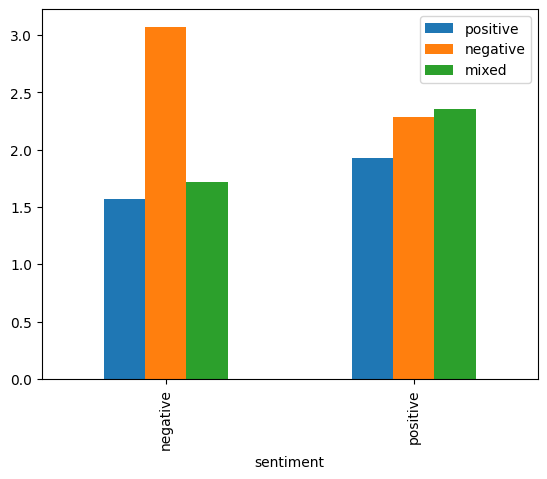

In [ ]:
pos_sent_neg_key=pd.DataFrame()
pos_sent_pos_key=pd.DataFrame()
pos_sent_mix_key=pd.DataFrame()
neg_sent_neg_key=pd.DataFrame()
neg_sent_pos_key=pd.DataFrame()
neg_sent_mix_key=pd.DataFrame()

pos_sent_neg_key["negative"]=df_gelb["Dieser Text ist frei von Rechtschreib- und Grammatikfehlern."]
pos_sent_neg_key.loc[:,"sentiment"]="positive"
pos_sent_pos_key["positive"]=df_lila[["Dieser Text ist frei von Rechtschreib- und Grammatikfehlern..1"]]
pos_sent_pos_key.loc[:,"sentiment"]="positive"
pos_sent_mix_key["mixed"]=df_gruen[["Dieser Text ist frei von Rechtschreib- und Grammatikfehlern..2"]]
pos_sent_mix_key.loc[:,"sentiment"]="positive"
neg_sent_neg_key["negative"]=df_gruen["Dieser Text ist frei von Rechtschreib- und Grammatikfehlern..3"]
neg_sent_neg_key.loc[:,"sentiment"]="negative"
neg_sent_pos_key["positive"]=df_gelb["Dieser Text ist frei von Rechtschreib- und Grammatikfehlern..4"]
neg_sent_pos_key.loc[:,"sentiment"]="negative"
neg_sent_mix_key["mixed"]=df_lila["Dieser Text ist frei von Rechtschreib- und Grammatikfehlern..5"]
neg_sent_mix_key.loc[:,"sentiment"]="negative"

sent=pd.concat([pos_sent_neg_key,pos_sent_pos_key,pos_sent_mix_key,neg_sent_neg_key,neg_sent_pos_key,neg_sent_mix_key])
sent_grouped=sent.groupby(["sentiment"]).mean().reset_index()

sent_grouped.plot(x="sentiment", y=["positive", "negative","mixed"], kind="bar")

## Means for every statement for all texts

###Dieser Text ist positiv.

In [ ]:
print("Sentiment: ",df["Dieser Text ist positiv."].mean()," | ",df["Dieser Text ist positiv."].std())
for i in range(1,18):
  column="Dieser Text ist positiv.."+str(i)
  if i in [3,4,5,9,10,11,15,16,17]:
   # print(i)
   df[column]=5-df[column]+1
  print( "Sentiment: ", i,df[column].mean()," | ",df[column].std())

Sentiment:  3.5294117647058822  |  1.1245914290767742
Sentiment:  1 4.428571428571429  |  0.9376144618769908
Sentiment:  2 3.6875  |  1.0781929326423914
Sentiment:  3 5.0  |  0.0
Sentiment:  4 5.0  |  0.0
Sentiment:  5 5.0  |  0.0
Sentiment:  6 4.214285714285714  |  1.4238934396479703
Sentiment:  7 3.875  |  0.8850612031567836
Sentiment:  8 4.529411764705882  |  0.7174300539794393
Sentiment:  9 1.5294117647058822  |  0.7998161553463028
Sentiment:  10 4.928571428571429  |  0.2672612419124244
Sentiment:  11 4.9375  |  0.25
Sentiment:  12 4.375  |  1.0878112581387147
Sentiment:  13 4.647058823529412  |  0.701888209634219
Sentiment:  14 4.357142857142857  |  0.633323693776651
Sentiment:  15 5.0  |  0.0
Sentiment:  16 4.6875  |  0.47871355387816905
Sentiment:  17 4.647058823529412  |  0.9963167462326072


###Dieser Text ist frei von Rechtschreib- und Grammatikfehlern.

In [ ]:
print("Fehler: ",0,df["Dieser Text ist frei von Rechtschreib- und Grammatikfehlern."].mean()," | ",df["Dieser Text ist frei von Rechtschreib- und Grammatikfehlern."].std())
for i in range(1,18):
  column="Dieser Text ist frei von Rechtschreib- und Grammatikfehlern.."+str(i)
  print("Fehler: ", i,df[column].mean()," | ",df[column].std())

Fehler:  0 2.2857142857142856  |  1.138728807356386
Fehler:  1 1.9285714285714286  |  1.4917354742965405
Fehler:  2 2.357142857142857  |  1.1507283885330302
Fehler:  3 3.0714285714285716  |  1.4392458342578487
Fehler:  4 1.5714285714285714  |  0.8516306272526403
Fehler:  5 1.7142857142857142  |  1.2043875831929896
Fehler:  6 4.571428571428571  |  0.5135525910130955
Fehler:  7 4.0  |  1.1094003924504583
Fehler:  8 4.285714285714286  |  1.1387288073563857
Fehler:  9 2.7857142857142856  |  1.3688047244316386
Fehler:  10 2.642857142857143  |  1.5984195491000024
Fehler:  11 4.214285714285714  |  0.6992932067530679
Fehler:  12 3.7142857142857144  |  1.4373357526806554
Fehler:  13 3.0  |  1.1094003924504583
Fehler:  14 3.0714285714285716  |  1.542439911024374
Fehler:  15 3.0714285714285716  |  1.5915297775935684
Fehler:  16 3.5714285714285716  |  0.9376144618769909
Fehler:  17 4.071428571428571  |  0.8287419301647448


### Dieser Text ist gut strukturiert.

In [ ]:
print("Struktur: ",0,df["Dieser Text ist gut strukturiert."].mean()," | ",df["Dieser Text ist gut strukturiert."].std())
for i in range(1,18):
  column="Dieser Text ist gut strukturiert.."+str(i)
  print("Struktur: ", i,df[column].mean()," | ",df[column].std())

Struktur:  0 2.142857142857143  |  0.9492622930986468
Struktur:  1 2.142857142857143  |  1.167320591199077
Struktur:  2 2.5  |  0.9405399431259602
Struktur:  3 2.0  |  0.8770580193070292
Struktur:  4 1.6428571428571428  |  0.928782731664065
Struktur:  5 1.3571428571428572  |  0.4972451580988469
Struktur:  6 3.5714285714285716  |  1.5548576840284831
Struktur:  7 3.142857142857143  |  1.167320591199077
Struktur:  8 2.5  |  1.224744871391589
Struktur:  9 1.8571428571428572  |  0.7703288865196434
Struktur:  10 2.142857142857143  |  1.167320591199077
Struktur:  11 3.2857142857142856  |  1.2043875831929898
Struktur:  12 1.5  |  0.7595545253127499
Struktur:  13 3.357142857142857  |  1.2157392722216298
Struktur:  14 2.5  |  0.9405399431259602
Struktur:  15 1.8571428571428572  |  1.1673205911990772
Struktur:  16 2.142857142857143  |  1.0994504121565505
Struktur:  17 3.357142857142857  |  1.0818177620697815


### Dieser Text ist leicht verständlich.

In [ ]:
print("Verständlichkeit: ",0,df["Dieser Text ist leicht verständlich."].mean()," | ",df["Dieser Text ist leicht verständlich."].std())
for i in range(1,18):
  column="Dieser Text ist leicht verständlich.."+str(i)
  print("Verständlichkeit: ", i,df[column].mean()," | ",df[column].std())

Verständlichkeit:  0 3.5  |  0.8548504142651103
Verständlichkeit:  1 3.7857142857142856  |  1.1883130530663677
Verständlichkeit:  2 2.9285714285714284  |  1.2066664642907567
Verständlichkeit:  3 2.642857142857143  |  1.1507283885330302
Verständlichkeit:  4 2.7857142857142856  |  1.188313053066368
Verständlichkeit:  5 2.642857142857143  |  1.27744594087896
Verständlichkeit:  6 4.285714285714286  |  1.0690449676496976
Verständlichkeit:  7 3.7857142857142856  |  0.9749612559222292
Verständlichkeit:  8 4.214285714285714  |  0.8017837257372732
Verständlichkeit:  9 3.142857142857143  |  1.292412345317728
Verständlichkeit:  10 3.142857142857143  |  1.4064216928154862
Verständlichkeit:  11 4.285714285714286  |  0.9138735334633755
Verständlichkeit:  12 3.7857142857142856  |  0.892582375303981
Verständlichkeit:  13 3.7857142857142856  |  1.1217137594956024
Verständlichkeit:  14 3.9285714285714284  |  0.7300459115473718
Verständlichkeit:  15 3.5  |  1.0919284281983377
Verständlichkeit:  16 2.7857

###Ein Muttersprachler könnte den Text genauso geschrieben haben.

In [ ]:
print("Muttersprachler: ",0,df["Ein Muttersprachler könnte den Text genauso geschrieben haben."].mean()," | ",df["Ein Muttersprachler könnte den Text genauso geschrieben haben."].std())
for i in range(1,18):
  column="Ein Muttersprachler könnte den Text genauso geschrieben haben.."+str(i)
  print("Muttersprachler: ", i,df[column].mean()," | ",df[column].std(),)

Muttersprachler:  0 1.7142857142857142  |  0.7262730392025629
Muttersprachler:  1 2.2857142857142856  |  1.1387288073563857
Muttersprachler:  2 1.6428571428571428  |  1.0818177620697815
Muttersprachler:  3 2.0  |  1.1766968108291043
Muttersprachler:  4 1.6428571428571428  |  0.8418973861410954
Muttersprachler:  5 1.3571428571428572  |  0.744946343668492
Muttersprachler:  6 4.142857142857143  |  1.0994504121565505
Muttersprachler:  7 2.9285714285714284  |  1.4917354742965407
Muttersprachler:  8 3.0  |  1.2403473458920846
Muttersprachler:  9 2.357142857142857  |  0.928782731664065
Muttersprachler:  10 1.6428571428571428  |  0.633323693776651
Muttersprachler:  11 3.357142857142857  |  1.1507283885330302
Muttersprachler:  12 1.6428571428571428  |  1.0082080720186268
Muttersprachler:  13 2.9285714285714284  |  1.542439911024374
Muttersprachler:  14 2.5  |  1.286019499792345
Muttersprachler:  15 2.2142857142857144  |  1.1883130530663677
Muttersprachler:  16 2.142857142857143  |  1.2924123453

###Dieser Text ergibt Sinn.

In [ ]:
print("Sinn: ",0,df["Dieser Text ergibt Sinn."].mean()," | ",df["Dieser Text ergibt Sinn."].std())
for i in range(1,18):
  column="Dieser Text ergibt Sinn.."+str(i)
  print("Sinn: ", i,df[column].mean()," | ",df[column].std())

Sinn:  0 3.0714285714285716  |  1.0716117059605352
Sinn:  1 3.5714285714285716  |  1.0894095588038444
Sinn:  2 2.642857142857143  |  0.9287827316640651
Sinn:  3 2.4285714285714284  |  1.1578684470436789
Sinn:  4 2.7857142857142856  |  1.05090228108783
Sinn:  5 2.0  |  1.1094003924504583
Sinn:  6 3.7857142857142856  |  1.5776599725577716
Sinn:  7 3.2857142857142856  |  1.0690449676496976
Sinn:  8 3.7857142857142856  |  0.5789342235218394
Sinn:  9 3.0  |  0.9607689228305228
Sinn:  10 2.5714285714285716  |  1.2224996910042534
Sinn:  11 3.642857142857143  |  1.3363062095621219
Sinn:  12 2.7857142857142856  |  0.892582375303981
Sinn:  13 3.5714285714285716  |  1.0894095588038444
Sinn:  14 3.5  |  0.7595545253127499
Sinn:  15 3.2142857142857144  |  1.1217137594956024
Sinn:  16 2.642857142857143  |  1.0082080720186268
Sinn:  17 3.5  |  1.1602387022306428


###Die Übergänge in dem Text sind gut geschrieben

In [ ]:
print("Übergänge: ",0,df["Die Übergänge in dem Text sind gut geschrieben"].mean()," | ",df["Die Übergänge in dem Text sind gut geschrieben"].std())
for i in range(1,18):
  column="Die Übergänge in dem Text sind gut geschrieben."+str(i)
  print("Übergänge: ", i,df[column].mean()," | ",df[column].std())

Übergänge:  0 1.8571428571428572  |  1.027105182026191
Übergänge:  1 2.142857142857143  |  1.0994504121565505
Übergänge:  2 1.9285714285714286  |  0.7300459115473718
Übergänge:  3 1.7857142857142858  |  1.05090228108783
Übergänge:  4 1.5  |  0.7595545253127499
Übergänge:  5 1.5714285714285714  |  1.0163498575623617
Übergänge:  6 2.9285714285714284  |  1.328057326976612
Übergänge:  7 3.2142857142857144  |  0.892582375303981
Übergänge:  8 2.642857142857143  |  1.2774459408789602
Übergänge:  9 1.8571428571428572  |  0.7703288865196434
Übergänge:  10 1.6428571428571428  |  0.8418973861410954
Übergänge:  11 2.857142857142857  |  1.292412345317728
Übergänge:  12 2.0  |  1.1766968108291043
Übergänge:  13 2.642857142857143  |  1.2774459408789602
Übergänge:  14 2.4285714285714284  |  1.0894095588038444
Übergänge:  15 1.7857142857142858  |  1.1217137594956026
Übergänge:  16 2.2142857142857144  |  0.892582375303981
Übergänge:  17 2.9285714285714284  |  0.9168747682531899


## Calculate Cronbach's alpha for groups: fluency and coherence

In [ ]:
test=df_gelb
test=test.iloc[:,4:]
test
#rint(test.columns)
j=0
test['Dieser Text ist positiv..4']=5-test['Dieser Text ist positiv..4']+1
test['Dieser Text ist positiv..9']=5-test['Dieser Text ist positiv..9']+1
test['Dieser Text ist positiv..17']=5-test['Dieser Text ist positiv..17']+1
dfg=pd.DataFrame()
for i in range(1,7):

  temp=test.iloc[:,j:7*i]
  temp.rename(columns=lambda x: ''.join(filter(lambda y: not y.isdigit(), x)), inplace=True)
  temp.rename(columns=lambda x: x.replace('.', ''), inplace=True)
  #print(temp.columns)
  j=7*i
  dfg = dfg.append(temp, ignore_index=True)

<ipython-input-47-16a7a4a58917>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfg = dfg.append(temp, ignore_index=True)
<ipython-input-47-16a7a4a58917>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfg = dfg.append(temp, ignore_index=True)
<ipython-input-47-16a7a4a58917>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfg = dfg.append(temp, ignore_index=True)
<ipython-input-47-16a7a4a58917>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfg = dfg.append(temp, ignore_index=True)
<ipython-input-47-16a7a4a58917>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pa

In [ ]:
test=df_gruen
test=test.iloc[:,4:]
test
#rint(test.columns)
j=0
test['Dieser Text ist positiv..3']=5-test['Dieser Text ist positiv..3']+1
test['Dieser Text ist positiv..11']=5-test['Dieser Text ist positiv..11']+1
test['Dieser Text ist positiv..16']=5-test['Dieser Text ist positiv..16']+1
dfgr=pd.DataFrame()
for i in range(1,7):

  temp=test.iloc[:,j:7*i]
  temp.rename(columns=lambda x: ''.join(filter(lambda y: not y.isdigit(), x)), inplace=True)
  temp.rename(columns=lambda x: x.replace('.', ''), inplace=True)
  #print(temp.columns)
  j=7*i
  dfgr = dfgr.append(temp, ignore_index=True)

<ipython-input-48-01d5e3f4a30d>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfgr = dfgr.append(temp, ignore_index=True)
<ipython-input-48-01d5e3f4a30d>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfgr = dfgr.append(temp, ignore_index=True)
<ipython-input-48-01d5e3f4a30d>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfgr = dfgr.append(temp, ignore_index=True)
<ipython-input-48-01d5e3f4a30d>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfgr = dfgr.append(temp, ignore_index=True)
<ipython-input-48-01d5e3f4a30d>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version

In [ ]:
test=df_lila
test=test.iloc[:,4:]
test
#rint(test.columns)
j=0
test['Dieser Text ist positiv..5']=5-test['Dieser Text ist positiv..5']+1
test['Dieser Text ist positiv..10']=5-test['Dieser Text ist positiv..10']+1
test['Dieser Text ist positiv..15']=5-test['Dieser Text ist positiv..15']+1
dfl=pd.DataFrame()
for i in range(1,7):
  temp=test.iloc[:,j:7*i]
  temp.rename(columns=lambda x: ''.join(filter(lambda y: not y.isdigit(), x)), inplace=True)
  temp.rename(columns=lambda x: x.replace('.', ''), inplace=True)
  #print(temp.columns)
  j=7*i
  dfl = dfl.append(temp, ignore_index=True)

<ipython-input-49-e2a3207861ec>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfl = dfl.append(temp, ignore_index=True)
<ipython-input-49-e2a3207861ec>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfl = dfl.append(temp, ignore_index=True)
<ipython-input-49-e2a3207861ec>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfl = dfl.append(temp, ignore_index=True)
<ipython-input-49-e2a3207861ec>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfl = dfl.append(temp, ignore_index=True)
<ipython-input-49-e2a3207861ec>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pa

In [ ]:
df_whole=pd.concat([dfg,dfgr,dfl])
print( pg.cronbach_alpha(df_whole.iloc[:,1:5]))
print( pg.cronbach_alpha(df_whole.iloc[:,5:7]))

(0.7555421992493754, array([0.702, 0.801]))
(0.6481541189746902, array([0.549, 0.725]))


#####Evaluate categories after Cronbach's Alpha for the final Survey results per survey path

In [ ]:
test=df_gelb
test=test.iloc[:,4:]
test['Dieser Text ist positiv..4']=5-test['Dieser Text ist positiv..4']+1
test['Dieser Text ist positiv..9']=5-test['Dieser Text ist positiv..9']+1
test['Dieser Text ist positiv..17']=5-test['Dieser Text ist positiv..17']+1
neg=pd.DataFrame()
for i in range(1,7):

  print(i)

  temp=test.iloc[:,j:7*i]
  j=7*i
  print("SENTIMENT ",temp.iloc[:,0].mean(),"std",temp.iloc[:,0].std())
  median_fluency = temp.iloc[:,1:5].mean(axis=1)
  print("FLUENCY", "mean: ",np.mean(median_fluency),"std",np.std(median_fluency))
  median_coherence = temp.iloc[:,5:7].mean(axis=1)
  print("COHERENCE", "mean: ",np.mean(median_coherence),"std",np.std(median_coherence) )


1
SENTIMENT  3.642857142857143 std 1.15072838853303
FLUENCY mean:  2.4107142857142856 std 0.5141492874602847
COHERENCE mean:  2.4642857142857144 std 0.8549078002561302
2
SENTIMENT  5.0 std 0.0
FLUENCY mean:  1.9107142857142858 std 0.5141492874602847
COHERENCE mean:  2.142857142857143 std 0.7178482586514922
3
SENTIMENT  4.785714285714286 std 0.42581531362632014
FLUENCY mean:  3.5 std 0.82915619758885
COHERENCE mean:  3.2142857142857144 std 0.7726181304565691
4
SENTIMENT  1.3571428571428572 std 0.633323693776651
FLUENCY mean:  2.5357142857142856 std 0.7062042833316138
COHERENCE mean:  2.4285714285714284 std 0.7284313590846835
5
SENTIMENT  4.785714285714286 std 0.5789342235218395
FLUENCY mean:  3.267857142857143 std 1.0197351096620881
COHERENCE mean:  3.107142857142857 std 1.0031837075134387
6
SENTIMENT  4.785714285714286 std 0.8017837257372733
FLUENCY mean:  3.732142857142857 std 0.9280561757275915
COHERENCE mean:  3.2142857142857144 std 0.7953949089757175


In [ ]:
test=df_gruen
test=test.iloc[:,4:]
test
#rint(test.columns)
j=0
test['Dieser Text ist positiv..3']=5-test['Dieser Text ist positiv..3']+1
test['Dieser Text ist positiv..11']=5-test['Dieser Text ist positiv..11']+1
test['Dieser Text ist positiv..16']=5-test['Dieser Text ist positiv..16']+1
for i in range(1,7):
  print(i)

  temp=test.iloc[:,j:7*i]
  j=7*i
  print("SENTIMENT ",temp.iloc[:,0].mean(),"std",temp.iloc[:,0].std())
  median_fluency = temp.iloc[:,1:5].mean(axis=1)
  print("FLUENCY", "mean: ",np.mean(median_fluency),"std",np.std(median_fluency))
  median_coherence = temp.iloc[:,5:7].mean(axis=1)
  print("COHERENCE", "mean: ",np.mean(median_coherence),"std",np.std(median_coherence) )



1
SENTIMENT  3.5714285714285716 std 1.0894095588038442
FLUENCY mean:  2.357142857142857 std 0.7482973871341771
COHERENCE mean:  2.2857142857142856 std 0.6468132241526726
2
SENTIMENT  5.0 std 0.0
FLUENCY mean:  2.4285714285714284 std 0.6154888549862174
COHERENCE mean:  2.107142857142857 std 0.7601355947783129
3
SENTIMENT  3.857142857142857 std 0.9492622930986468
FLUENCY mean:  3.4642857142857144 std 0.8806305718527109
COHERENCE mean:  3.25 std 0.75
4
SENTIMENT  5.0 std 0.0
FLUENCY mean:  3.7857142857142856 std 0.6604729288895332
COHERENCE mean:  3.25 std 1.1764049351429002
5
SENTIMENT  4.285714285714286 std 1.1387288073563857
FLUENCY mean:  2.6607142857142856 std 0.5871172222419142
COHERENCE mean:  2.392857142857143 std 0.8276164447326049
6
SENTIMENT  4.714285714285714 std 0.4688072309384955
FLUENCY mean:  2.6607142857142856 std 0.7476579076949401
COHERENCE mean:  2.4285714285714284 std 0.7525466966323384


In [ ]:
test=df_lila
test=test.iloc[:,4:]
test
#rint(test.columns)
j=0
test['Dieser Text ist positiv..5']=5-test['Dieser Text ist positiv..5']+1
test['Dieser Text ist positiv..10']=5-test['Dieser Text ist positiv..10']+1
test['Dieser Text ist positiv..15']=5-test['Dieser Text ist positiv..15']+1
for i in range(1,7):
  print(i)

  temp=test.iloc[:,j:7*i]
  j=7*i
  print("SENTIMENT ",temp.iloc[:,0].mean(),"std",temp.iloc[:,0].std())
  median_fluency = temp.iloc[:,1:5].mean(axis=1)
  print("FLUENCY", "mean: ",np.mean(median_fluency),"std",np.std(median_fluency))
  median_coherence = temp.iloc[:,5:7].mean(axis=1)
  print("COHERENCE", "mean: ",np.mean(median_coherence),"std",np.std(median_coherence) )


1
SENTIMENT  4.428571428571429 std 0.937614461876991
FLUENCY mean:  2.5357142857142856 std 0.8957097288560323
COHERENCE mean:  2.857142857142857 std 0.8748177652797064
2
SENTIMENT  5.0 std 0.0
FLUENCY mean:  1.7678571428571428 std 0.5935989335212378
COHERENCE mean:  1.7857142857142858 std 0.6998542122237652
3
SENTIMENT  4.214285714285714 std 1.4238934396479697
FLUENCY mean:  4.142857142857143 std 0.8167569018592338
COHERENCE mean:  3.357142857142857 std 1.3286482312670196
4
SENTIMENT  4.928571428571429 std 0.26726124191242434
FLUENCY mean:  2.392857142857143 std 0.7889543583705185
COHERENCE mean:  2.107142857142857 std 0.8057510123341769
5
SENTIMENT  4.357142857142857 std 0.6333236937766509
FLUENCY mean:  3.0 std 0.6338656910463875
COHERENCE mean:  2.9642857142857144 std 0.7668182340565673
6
SENTIMENT  5.0 std 0.0
FLUENCY mean:  2.6607142857142856 std 0.8161710630018886
COHERENCE mean:  2.5 std 0.9819805060619657
